# PREDICT IF THE CUSTOMER WOULD SUBSCRIBE TO A TERM DEPOSIT 

####     There has been a revenue decline for a bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Set Information:
#### The data is related to direct marketing campaigns run by a Portuguese banking institution. 
#### There are two datasets: train.csv with all examples (32950) and 14 features including the target feature and test.csv which is the test data that consists of 8238 observations and 13 features without the target feature
#### Goal:- The goal is to predict if the client will subscribe to a term deposit or not.

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import missingno as msno

# PART 1- DATA PREPARATION AND EDA

In [2]:
data=pd.read_csv('new_train2.csv')

In [3]:
#Length of the data(Returns number of rows)

print(len(data))

32950


In [4]:
#Shape of the data(Returns number of rows and columns)

print(data.shape)

(32950, 14)


In [5]:
#List the columns(Returns an object with all the column headers)

print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')


In [6]:
#Checking for unique values in each of the columns
categorical_data = data.select_dtypes(exclude=np.number)

for column in categorical_data:
    print(column)
    print(categorical_data[column].unique())

job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital
['married' 'divorced' 'single' 'unknown']
education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default
['unknown' 'no' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['cellular' 'telephone']
month
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week
['wed' 'mon' 'tue' 'fri' 'thu']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [7]:
# Age - age of a person
# job - type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# martial - marital status ('divorced','married','single','unknown')
# education-('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# default - has credit in default? ('no','yes','unknown')
# housing - has housing loan? ('no','yes','unknown')
# loan - has personal loan? ('no','yes','unknown')
# contact - contact communication type ('cellular','telephone')
# month - last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
# day_of_week - last contact day of the week ('mon','tue','wed','thu','fri')
# duration - last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
# campaign - number of contacts performed during this campaign and for this client (includes last contact)
# poutcome - outcome of the previous marketing campaign ('failure','nonexistent','success')
# y - Target variable of binary type(has the client subscribed to a term deposit? ('yes','no'))

In [8]:
#Check the datatypes(Returns different datatypes associated with each column)

data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object

In [9]:
# Analyzing the first 5 rows of the data set

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


In [10]:
# Analyzing the last 5 rows of the data set

data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,nonexistent,no


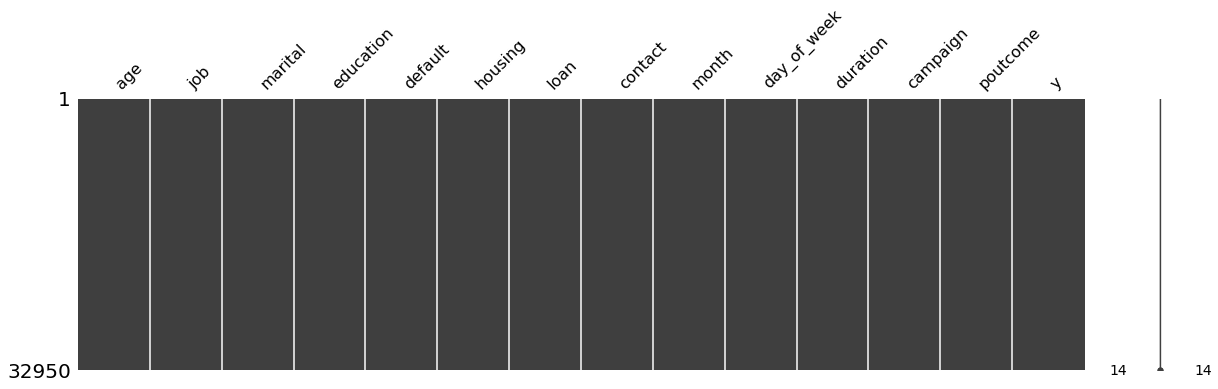

In [11]:
#Check for missing values in the dataset
#Dataset looks good with no missing values although it may have some unknown values

msno.matrix(data, figsize=(20,5))


In [12]:
# Let's seperate the numerical and categorical data and store them in seperate dataframes

numeric_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(exclude=np.number)

In [13]:
print(numeric_data.head())

   age  duration  campaign
0   49       227         4
1   37       202         2
2   55       550         1
3   36       120         2
4   55       368         2


In [14]:
print(categorical_data.head())

            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


### CHECKING FOR CLASS IMBALANCE
#### Class imbalance usually occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

In [15]:
print(data['y'].value_counts())

no     29238
yes     3712
Name: y, dtype: int64


In [16]:
# Let's find the percentage of each class in the feature 'y'
class_values = (data['y'].value_counts()/data['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64


#### The distribution of the target class is 89%:11%. This is a clear indication of imbalance.

### UNIVARIATE ANALYSIS OF CATEGORICAL FEATURES

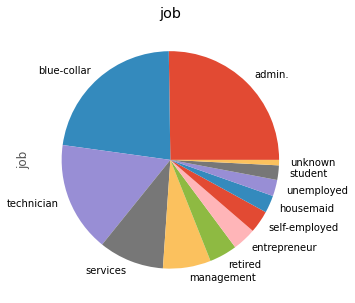

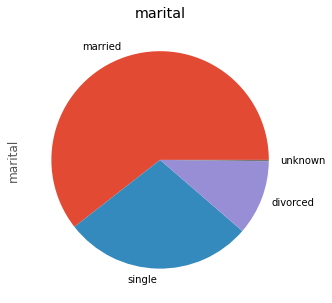

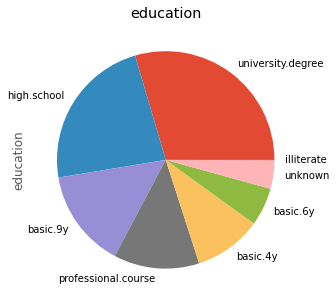

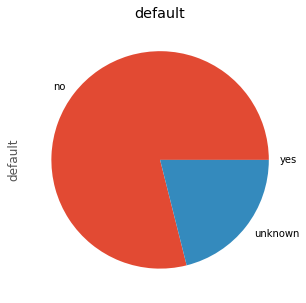

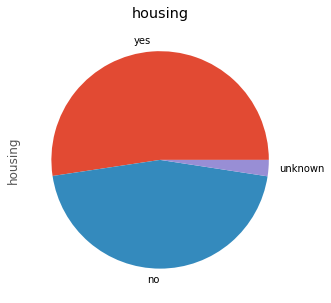

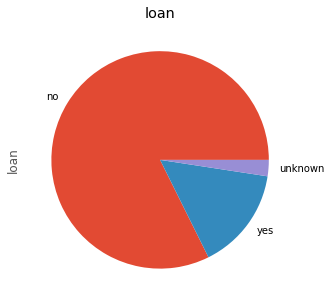

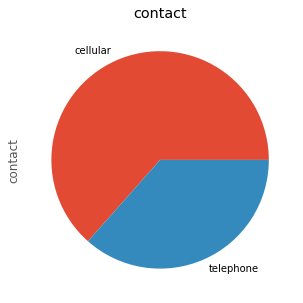

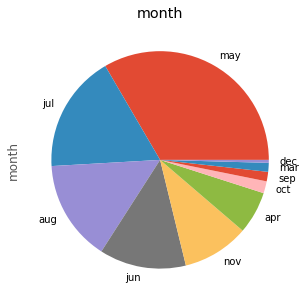

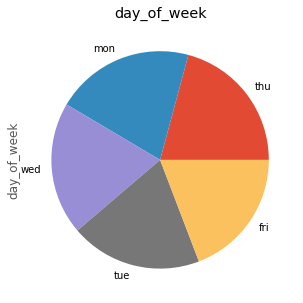

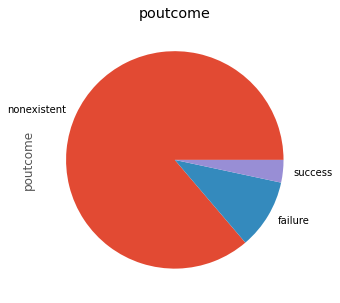

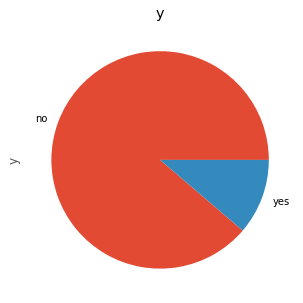

In [17]:
plt.style.use('ggplot')
# Plotting a bar chart for each of the categorical features
for column in categorical_data:
    plt.figure(figsize=(20,5))
    plt.subplot(111)
    categorical_data[column].value_counts().plot(kind='pie')
    plt.title(column)

### KEY OBSERVATION: 
* It can be seen that administration, blue-collar and technicians account to a major part of the customer base
* Most of the customers are married
* Most of the customers have completed high school or have a university degree
* Majority of the customers do not have a credit in default
* Most of the customers had a housing loan
* Majority of the customers had no personal loans
* Cellular mode of communication was the most favored method
* Many of the customers were contacted in the month of May
* There wasn't much difference in communication made across Mon-Fri
* The plot for the target class shows heavy imbalance



## Dealing with the 'Unknown' values present in most of the categorical features

In [18]:
# Replacing 'unknown' values with the mode of that column
for column in categorical_data:
    mode = categorical_data[column].mode()[0]
    categorical_data[column] = categorical_data[column].replace('unknown',mode)


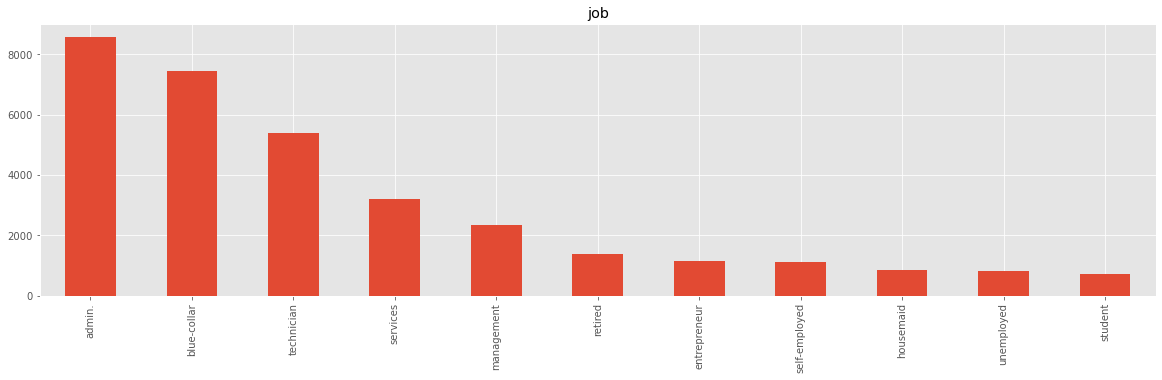

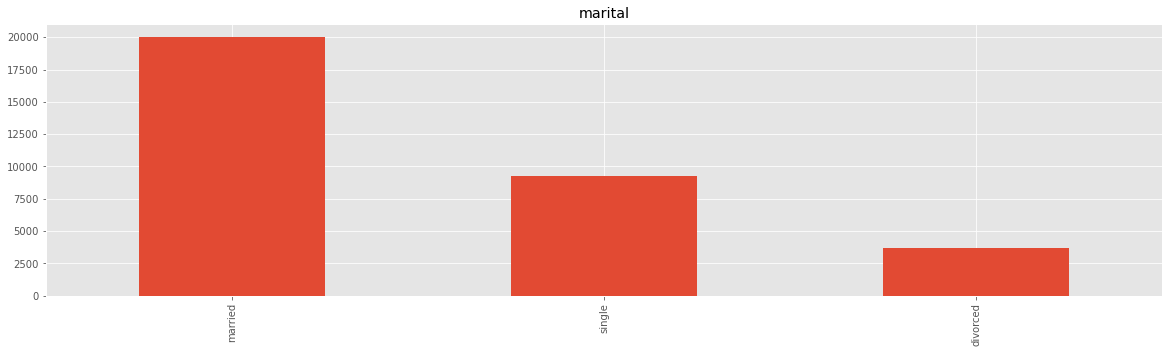

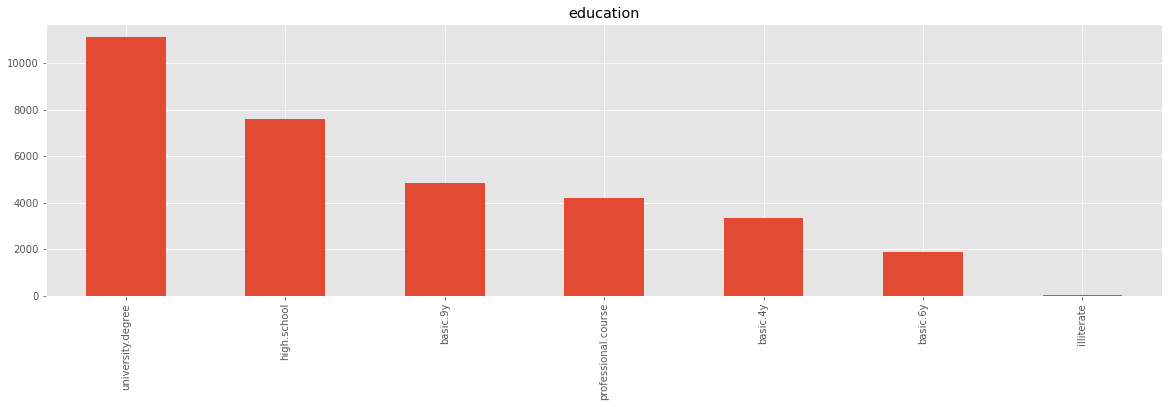

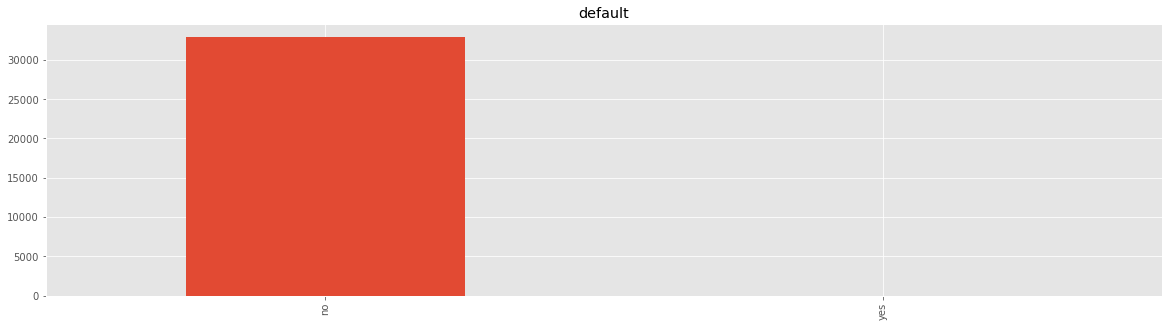

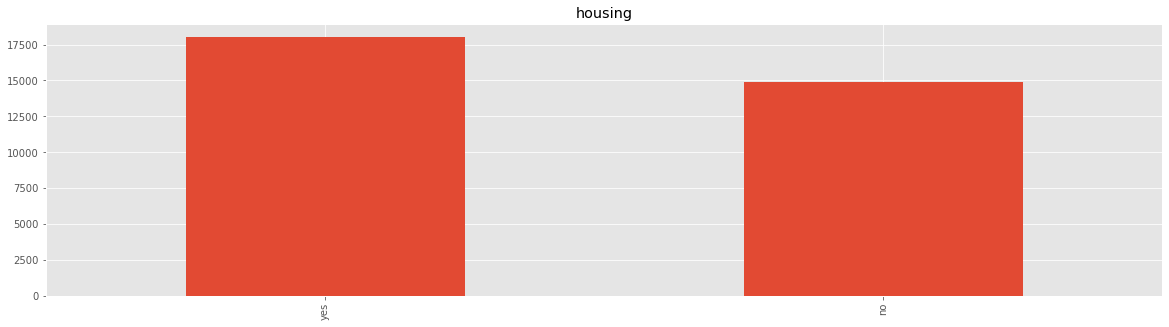

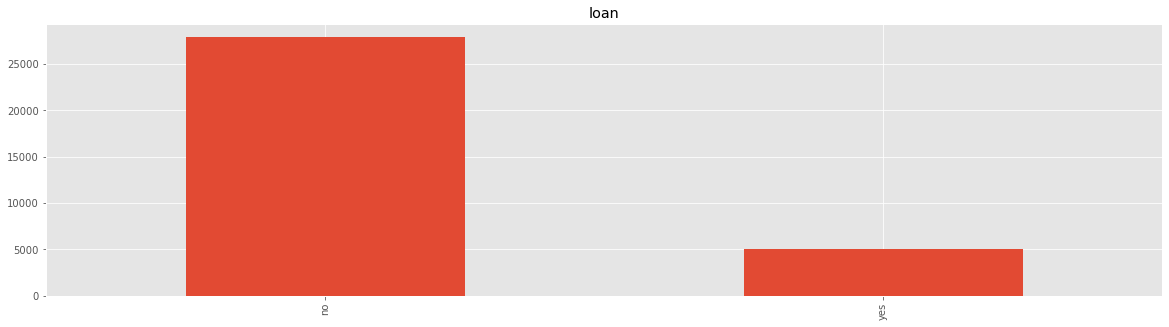

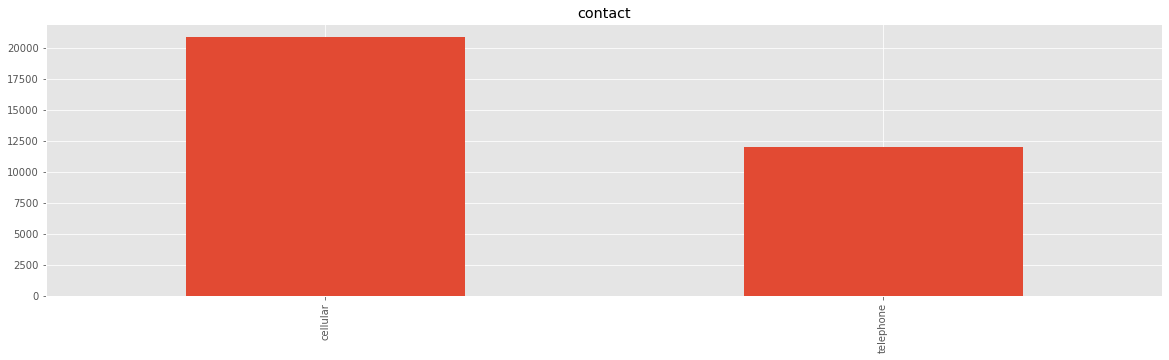

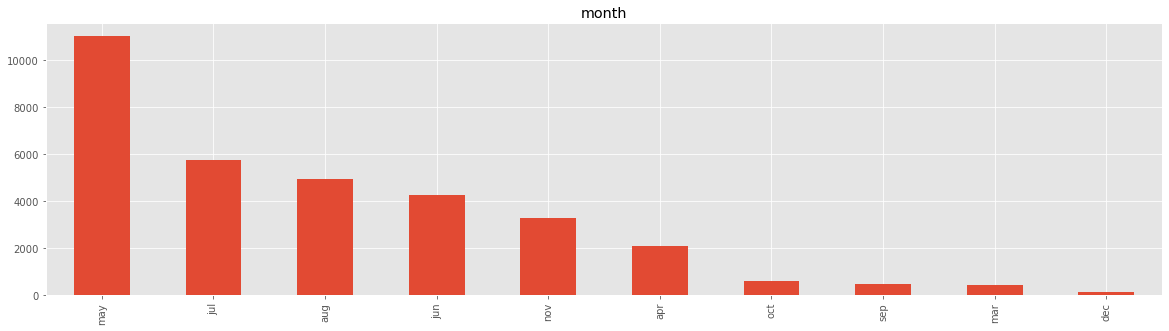

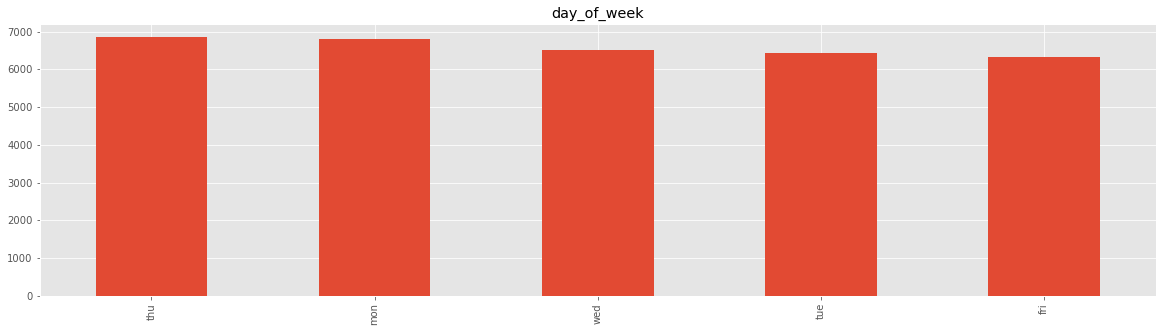

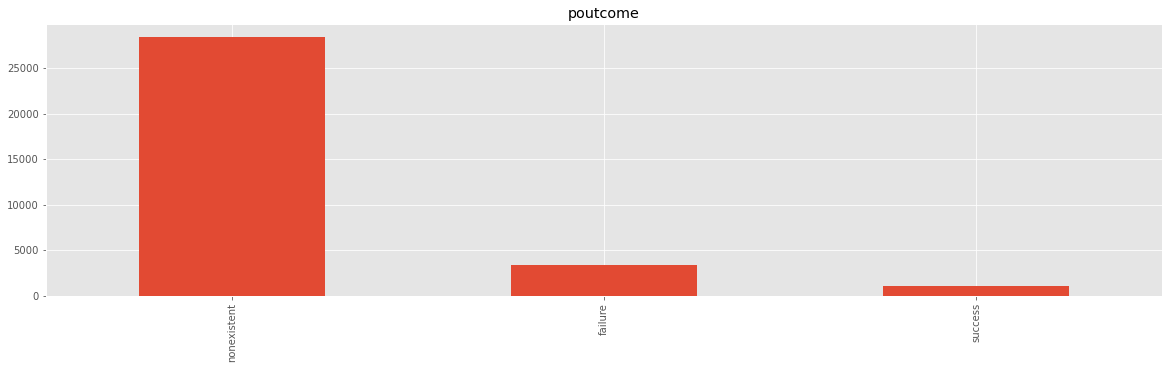

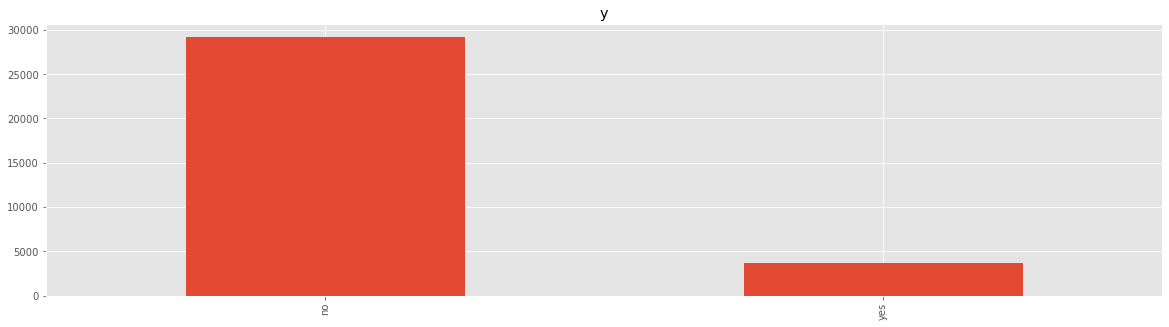

In [19]:
# Analyze data after replacing the unknown values
plt.style.use('ggplot')
# Plotting a bar chart for each of the categorical features
for column in categorical_data:
    plt.figure(figsize=(20,5))
    plt.subplot(111)
    categorical_data[column].value_counts().plot(kind='bar')
    plt.title(column)

## UNIVARIATE ANALYSIS OF NUMERIC FEATURES
#### Let's look for the distribution and the outliers

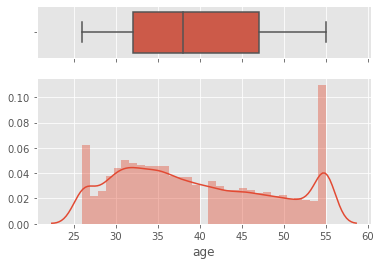

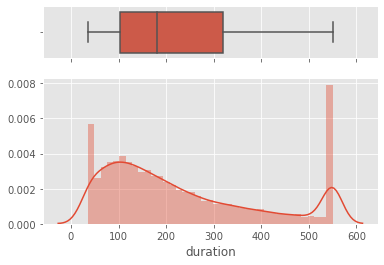

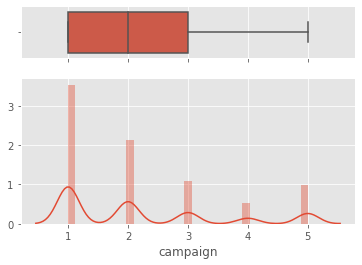

In [20]:
for column in numeric_data:
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)})
    # Add a graph in each part
    sns.boxplot(numeric_data[column], ax=ax_box)
    sns.distplot(numeric_data[column], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')


### KEY OBSERVATION:
* Most of the customers belong to 25-35 and 53-55 age group
* It can be seen that the call either lasted long enough or was too short
* Majority of the campaign contacts occured only once or twice

## BIVARIATE ANALYSIS OF CATEGORICAL FEATURES

#### Let's plot each of the categorical features against the target using barchart

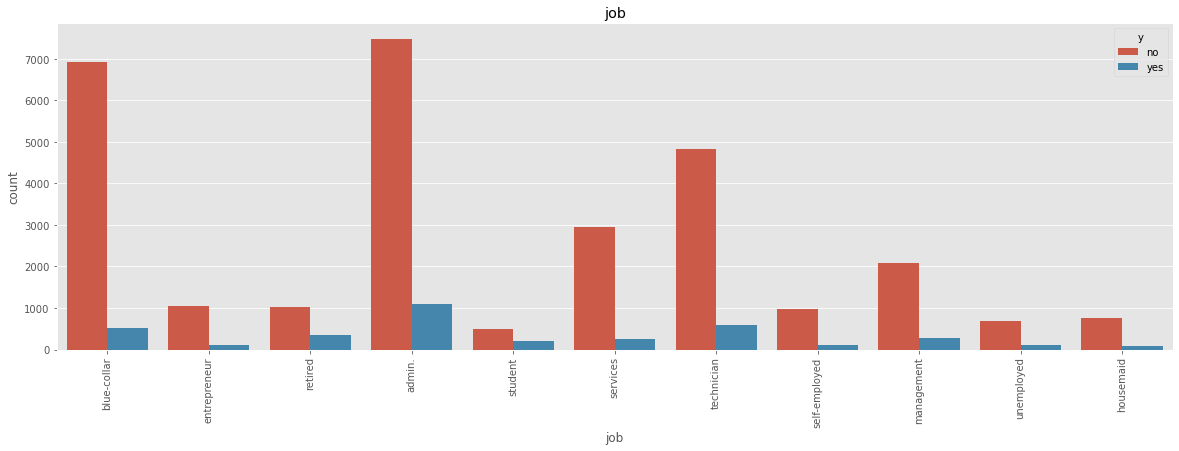

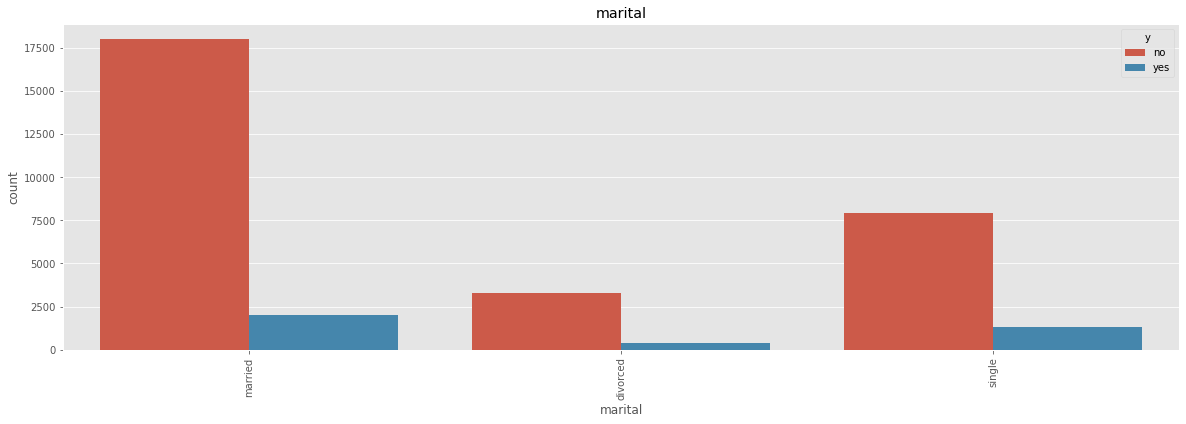

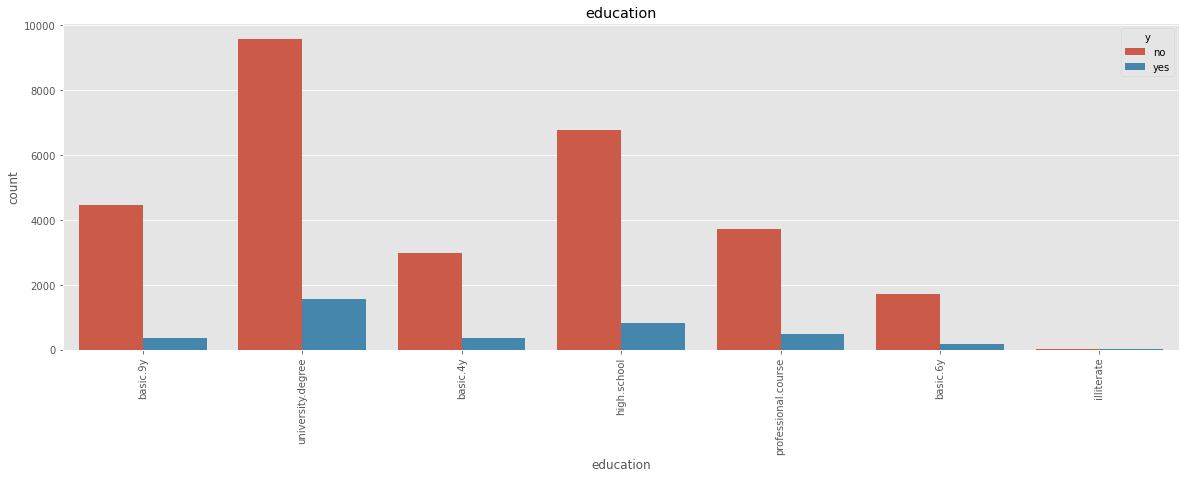

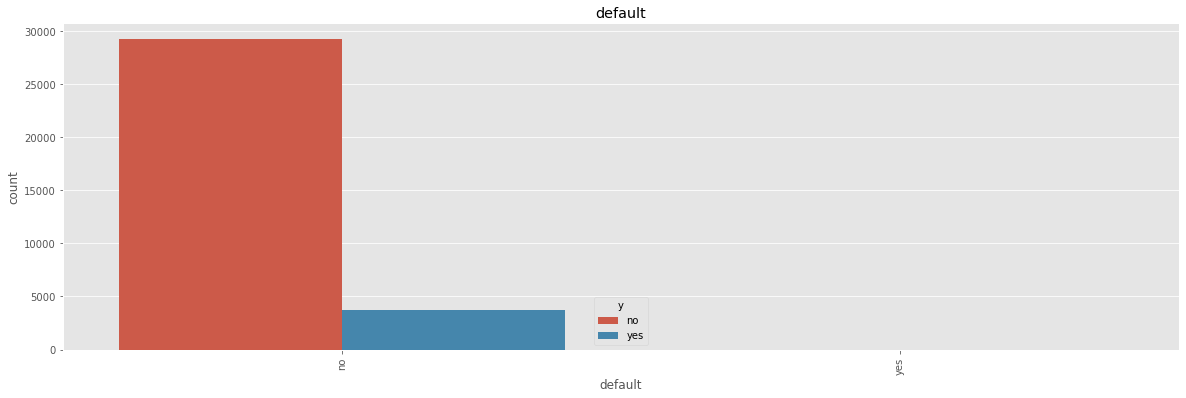

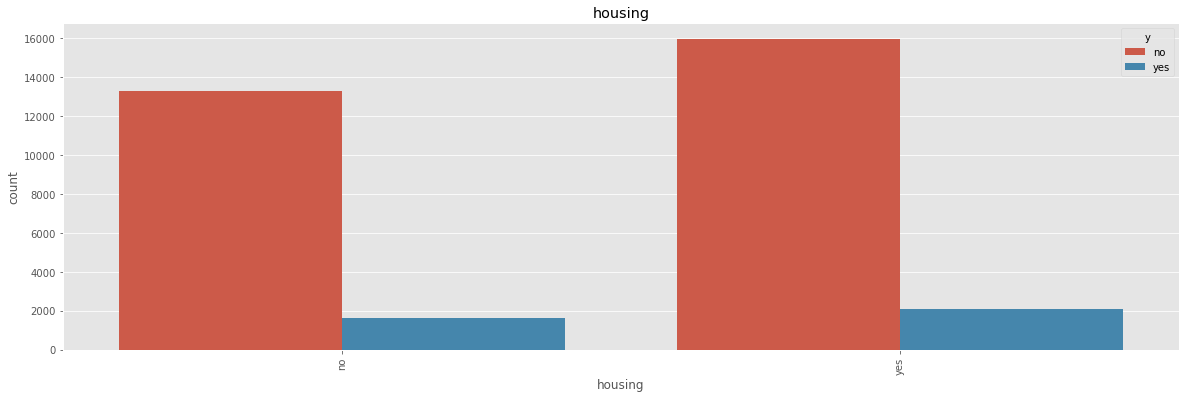

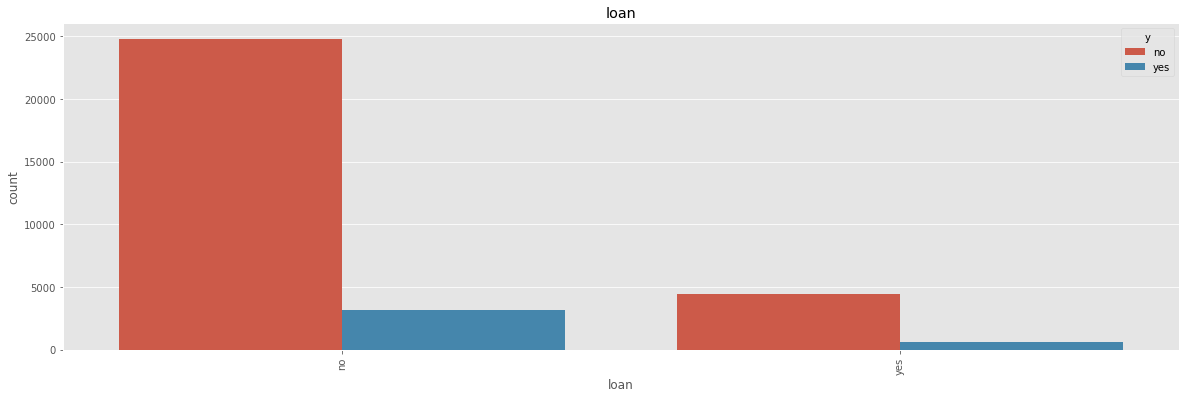

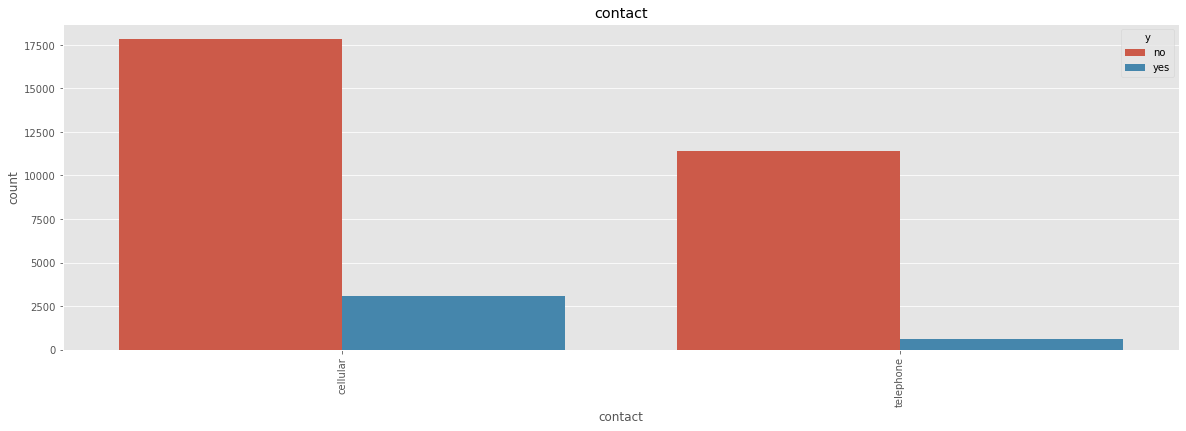

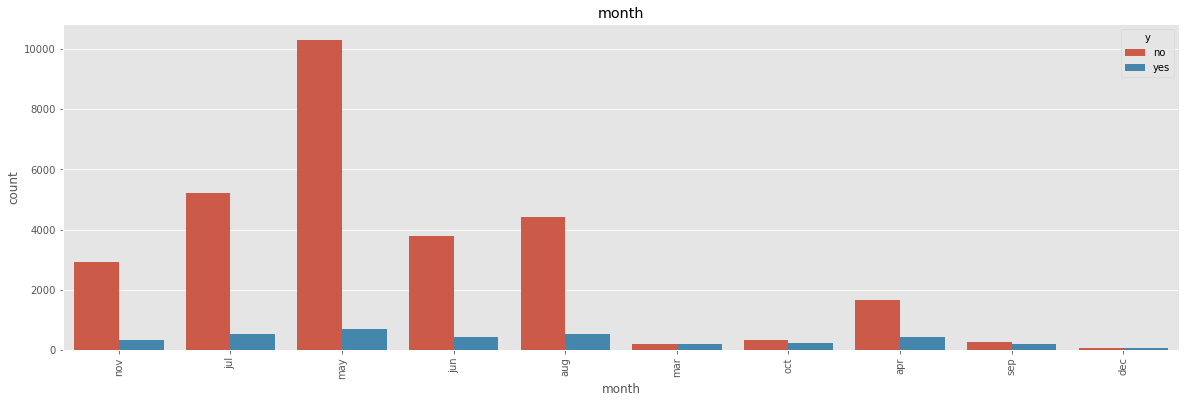

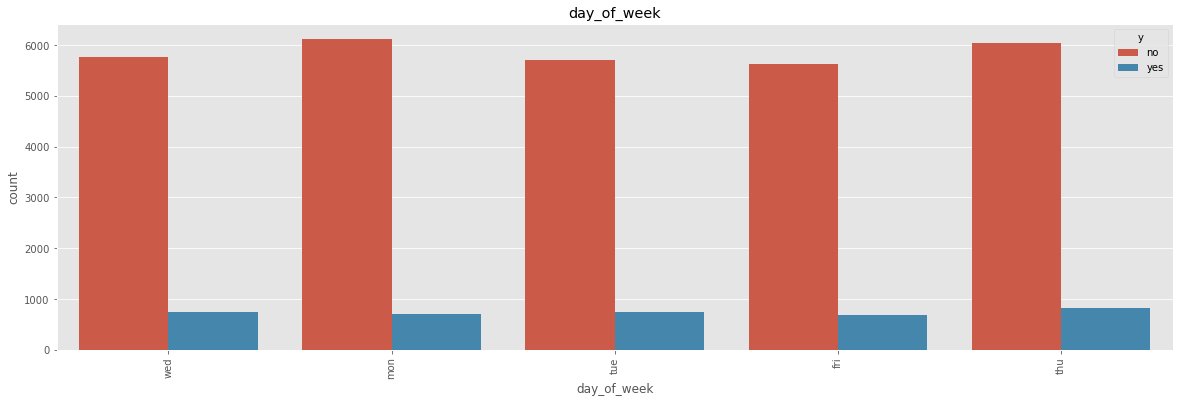

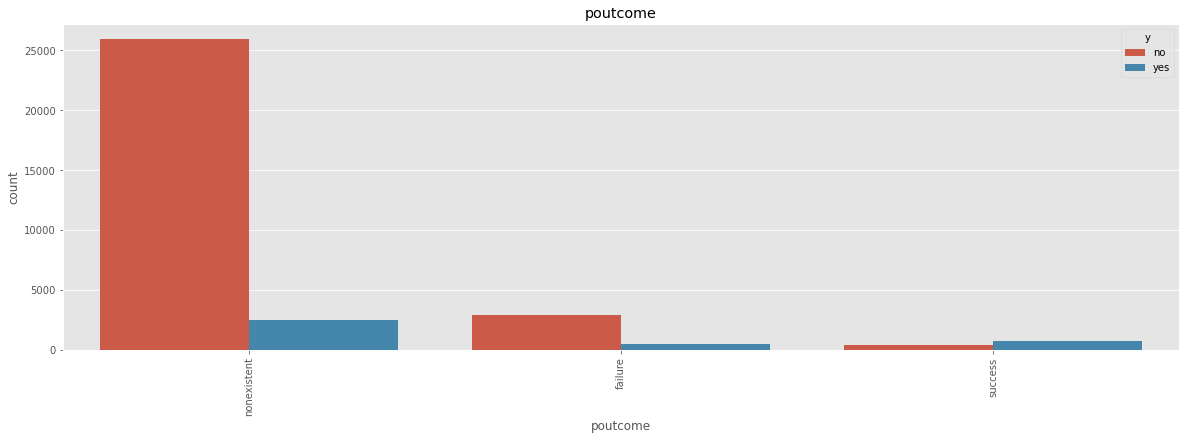

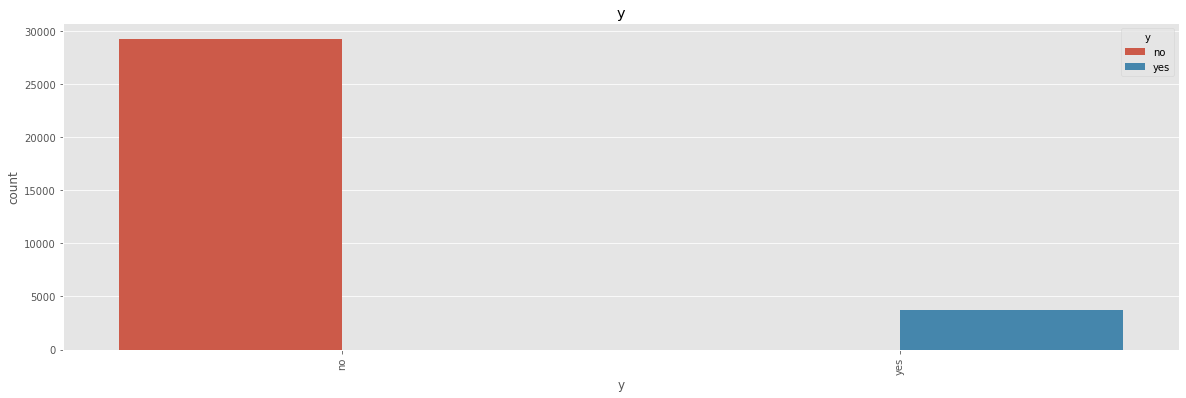

In [21]:
for column in categorical_data:
    plt.figure(figsize=(20,6))
    plt.subplot(111)
    sns.countplot(x=categorical_data[column],hue=categorical_data['y'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

### Key Observation: Common traits seen for customers who have subscribed for a term deposit are:
* Customers with an admin job have subscribed the most with technicians being the second majority
* Customers with married status have subscribed the most
* Majority of the customers who subscribed had a college degree or were high school pass-outs
* Majority of them had no credit in default and personal loans
* Having an housing loan or not, had no impact on subscribing for a term deposit
* Cellular mode of communication had high success ratio
* April-August had decent subscribers


## LABEL ENCODING FOR CATEGORICAL FEATURES

In [22]:
# As the machine learning model can only read numerical values we need encode categorical features into numerical values.
# Encoding can be done in two ways namely label encoding and one-hot encoding
# Here we will be using label encoding

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for column in categorical_data:
    try:
        categorical_data[column] = le.fit_transform(categorical_data[column])
    except:
        print('Error encoding '+column)

In [23]:
ed=pd.concat([numeric_data, categorical_data.reindex(numeric_data.index)], axis=1)

In [24]:
ed

,age,duration,campaign,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,49,227,4,1,1,2,0,0,0,0,7,4,1,0
1,37,202,2,2,1,6,0,0,0,1,7,4,0,0
2,55,550,1,5,1,0,0,0,0,0,3,1,1,1
3,36,120,2,0,1,6,0,1,0,1,6,1,1,0
4,55,368,2,5,0,6,0,0,0,0,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,7,2,3,0,1,0,0,3,3,1,0
32946,52,64,1,9,1,5,0,1,0,0,7,0,0,0
32947,54,131,4,0,1,2,0,0,1,0,3,1,1,0
32948,29,165,1,0,1,6,0,0,0,1,6,0,1,0


In [25]:
#Creating a csv file with the encoded values
ed.to_csv(r'C:\Users\aksha\Desktop\Bank\encoded_data.csv', index = False)


## PANDAS PROFILING

In [26]:
#Pandas profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(categorical_data)
prof

# PART 2 - MODEL SELECTION AND BUILDING

In [27]:
#Loading data modeling libraries
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [28]:
#Loading the encoded data
df=pd.read_csv('encoded_data.csv')

In [29]:
df.head()

,age,duration,campaign,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,49,227,4,1,1,2,0,0,0,0,7,4,1,0
1,37,202,2,2,1,6,0,0,0,1,7,4,0,0
2,55,550,1,5,1,0,0,0,0,0,3,1,1,1
3,36,120,2,0,1,6,0,1,0,1,6,1,1,0
4,55,368,2,5,0,6,0,0,0,0,4,3,1,0


### PREPARING THE TRAIN AND TEST DATA

#### The code below splits the data into training data and validation data. It then fits the classification model on the train data and then makes the prediction on the validation data and outputs the prediction score.



In [30]:
# Predictors
X = df.iloc[:,:-1]

# Target variable
y = df.iloc[:,-1]

In [31]:
# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

### FITTING LOGISTIC REGRESSION MODEL AND PREDICTING THE VALUES

In [32]:
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# Predicting the values
y_scores = model.predict(x_val)

### CHECKING MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      5798
           1       0.50      0.18      0.26       792

    accuracy                           0.88      6590
   macro avg       0.70      0.58      0.60      6590
weighted avg       0.85      0.88      0.85      6590

ROC_AUC_SCORE is 0.5772283894481204


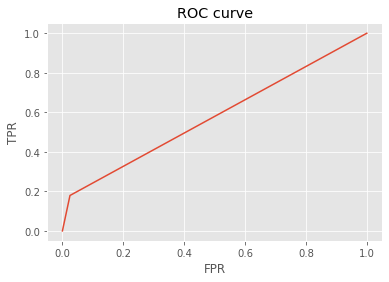

In [33]:
#Getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### FITTING DECISION TREE CLASSIFIER AND CHECKING MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5798
           1       0.45      0.46      0.45       792

    accuracy                           0.87      6590
   macro avg       0.69      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590

ROC_AUC_SCORE is 0.6900461583757549


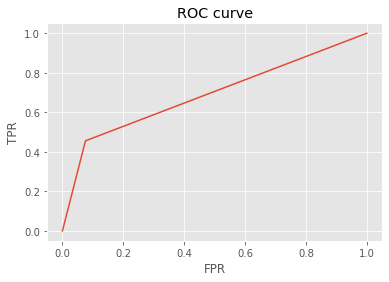

In [34]:
#Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### FITTING RANDOM FOREST CLASSIFIER AND CHECKING MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5798
           1       0.66      0.35      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.66      0.70      6590
weighted avg       0.89      0.90      0.89      6590

ROC_AUC_SCORE is 0.6616242190793761


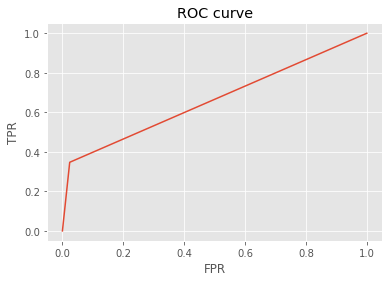

In [35]:
#Run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### GRID SEARCH AND HYPERPARAMETER TUNING

#### Hyperparameters are function attributes that we have to specify for an algorithm. Grid search is done to find out the best set of hyperparameters for your model.




#### Performing hyperparameter tuning for a random forest classifier using max_features, max_depth, criterion as hyperparameters

In [36]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


##### Applying the best parameters obtained using Grid Search on Random Forest model
##### In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively.

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      8723
           1       0.32      0.72      0.44      1162

    accuracy                           0.78      9885
   macro avg       0.63      0.75      0.65      9885
weighted avg       0.88      0.78      0.82      9885

[[6913 1810]
 [ 329  833]]


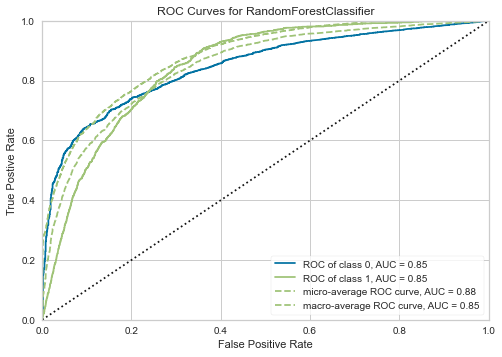

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(df,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(df,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using Random Forest model

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8723
           1       0.34      0.78      0.47      1162

    accuracy                           0.79      9885
   macro avg       0.65      0.79      0.67      9885
weighted avg       0.89      0.79      0.82      9885

[[6922 1801]
 [ 250  912]]


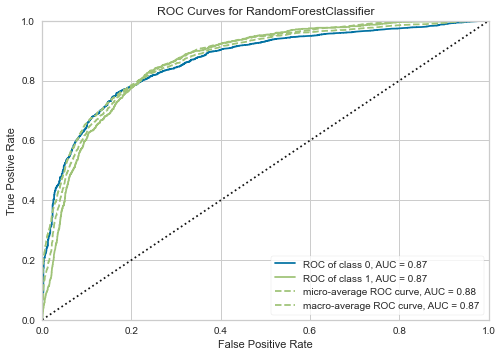

In [38]:
grid_search_random_forrest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']],y)

# PART 3- PREDICTION ON TEST DATA

In [39]:
#In the below task, we have performed a prediction on the test data. We have used Logistic Regression for this prediction. 

# Preprocessed Test File
test = pd.read_csv('new_test.csv')
test.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [ ]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_sample(x_train, y_train)


rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

# fitting the model
grid_search_model.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search.predict(test)
    
